# Research Data Scientist Interview Task
**Author: Shi Min Chua**  
## Description
The analysis explores the variation within the Reppada Language in relation to several demographic variables. Specifically, it examines how Reppada speakers use the term "day" in nine forms of the genitive plural. 

The notebook consists of the following sections:
1. [Data pre-processing](#Data-pre-processing): To structure data for analysis.
2. [Descriptive analysis](#Descriptive-analysis): To have an overview of each variable.
3. [Visualisation & Tabulation](#Visualisation): A descriptive analysis of the relationship between the demographic variables and usage of forms.
4. [Logistic regression](#logistic-regression): To examine the relationship between the demographic variables and the usage of the various ofrms of the term 'day'.
5. [Steps to ensure FAIR open research principles](#steps-to-ensure-fair-open-research-principles): My responses to the question. 

The analysis procedure and the code can also be applied to other similar datasets, with the note regarding how to use it documenting alongside the code, typically starting with #.

There are subsections within each section, including observation about the analysis that is only applicable for the current datasets. The rationale of conducting each analysis is also explained along. 

## Requirement
The analysis and visualisation is conducted by using Python, and the following libraries:
1. Matplotlib
2. Pandas
3. Numpy
4. Statsmodels
5. Scipy  


If you do not have the libraries installed in your computer, you could install them by running the first code cell right after this. The cell states Installing library. Just delete the # in front of the command %pip install. You only need to install once.
  
## Input Data
Two input data files are required for this analysis and they are saved in Microsoft Excel. The current datasets are provided by the Recruitment Team of IT Services, The University of Sheffield.

**Table 1**  
This file contains demographic characteristics of the speakers in six columns in the following order:  
1. Speakers: The speaker id is expressed in the format "Cases\\\\Speakers\\\\B10" where B10 is the id.  
2. Religion: The religion is expressed in text \(string\), for example "Skotadi"
3. Gender: The gender is expressed in text\(string\), for example "Male" 
4. Age: The age is expressed in number\(integer\), for example "53" 
5. Length of interview: The length of interview is expressed in number\(integer\), according to this scheme:  
>1 =less 30 min, 2 = 30 min to 1 hour,3=1 hour to 2 hours, 4=over two hours 

6. Village: The village is expressed in text\(string\), for example "Bonriki"   

 

**Table 2**  
The file contains the number of times each speaker used each form of the genitive plural, with the first column Nid referring to the speaker id, for example B10. The rest of the columns are the number of each form of variation recorded, with the last column being the total number. 


In [1]:
#Install required libraries
#%pip install matplotlib
#%pip install panda
#%pip install numpy
#%pip install statsmodels
#%pip install scipy 


In [2]:
#Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

In [3]:
# This is to hide warnings from the program. If you would like to see the warnings, just do not run it. 
import warnings
warnings.filterwarnings('ignore')

## Data pre-processing
In this step, we load the two data files and merge them into one, rename some columns and check for any missing values. To apply the same procedure to other datasets, please ensure the input data is structured as described above. 

In [4]:
#Read data
#The input data files Table 1 and Table 2 must be in the same folder as this jupyter notebook. 
#You could name your files differently. Do remember to change the filename in the following code accordingly. 
demographic = pd.read_excel("Table 1.xlsx")
declensions = pd.read_excel("Table 2.xlsx")

In [5]:
#Inspect the demographic data by looking at the top 5 rows to ensure the data is properly loaded.
demographic.head()

,Speaker,Religion,Gender,Age,"Length of interview ( 1 =less 30 min, 2 = 30 min to 1 hour,3=1 hour to 2 hours, 4=over two hours)",Village
0,Cases\\Speakers\\B10,Skotadi,Male,53,2,Bonriki
1,Cases\\Speakers\\B11,Drepadian,Female,51,1,Bonriki
2,Cases\\Speakers\\B12,Drepadian,Male,60,2,Bonriki
3,Cases\\Speakers\\B13,Thalassic,Male,45,2,Bonriki
4,Cases\\Speakers\\B14,Thalassic,Male,48,2,Bonriki


In [6]:
#Inspect the declensions data by looking at the top 5 rows to ensure the data is properly loaded.
declensions.head()

,Nid,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
0,B10,2,2,0,0,0,0,0,0,0,4
1,B11,0,0,0,0,0,0,0,0,0,0
2,B12,0,0,0,0,0,0,0,0,0,0
3,B13,0,0,0,0,0,0,0,0,0,0
4,B14,1,1,0,0,0,0,0,0,0,2


In [7]:
#Recode the speaker column in demographic so that it correspond to the Nid column in the declencions dataset. 
#For example, Cases\\Speakers\\B10 is transformed to B10 by removing Casses\\Speakers\\
#If your input dataset used the same ID structure, then you do not need to run this step.
demographic.replace(r'Cases\\\\Speakers\\\\',"", regex = True,inplace=True)
demographic.head()

,Speaker,Religion,Gender,Age,"Length of interview ( 1 =less 30 min, 2 = 30 min to 1 hour,3=1 hour to 2 hours, 4=over two hours)",Village
0,B10,Skotadi,Male,53,2,Bonriki
1,B11,Drepadian,Female,51,1,Bonriki
2,B12,Drepadian,Male,60,2,Bonriki
3,B13,Thalassic,Male,45,2,Bonriki
4,B14,Thalassic,Male,48,2,Bonriki


In [8]:
#Merging the two datasets
merged_df = pd.merge (demographic, declensions, left_on = 'Speaker', right_on = 'Nid')
merged_df.head()
#Remove Speaker column from the dataset since Nid referring to the same
merged_df.drop(columns=["Speaker"], inplace=True)
#Set Nid column as the index of the data
merged_df.set_index('Nid',inplace=True)
#The resulting dataset dimension, where the number of rows indicating number of participants, number of columns indicating number of variables. 
print(f"The data contains {merged_df.shape[0]} rows (participants) and {merged_df.shape[1]} columns (variables)")
#Show the first 5 rows of data to inspect if the data is correctly merged. 
merged_df.head()

The data contains 62 rows (participants) and 15 columns (variables)


,Religion,Gender,Age,"Length of interview ( 1 =less 30 min, 2 = 30 min to 1 hour,3=1 hour to 2 hours, 4=over two hours)",Village,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
Nid,,,,,,,,,,,,,,,
B10,Skotadi,Male,53,2,Bonriki,2,2,0,0,0,0,0,0,0,4
B11,Drepadian,Female,51,1,Bonriki,0,0,0,0,0,0,0,0,0,0
B12,Drepadian,Male,60,2,Bonriki,0,0,0,0,0,0,0,0,0,0
B13,Thalassic,Male,45,2,Bonriki,0,0,0,0,0,0,0,0,0,0
B14,Thalassic,Male,48,2,Bonriki,1,1,0,0,0,0,0,0,0,2


In [9]:
#Shorten the variable name for length of interview so that we could use the column more easily rather than typing so many words when we need to use the column. 
merged_df.rename(columns = {'Length of interview ( 1 =less 30 min, 2 = 30 min to 1 hour,3=1 hour to 2 hours, 4=over two hours)':'Interview_Length'}, inplace = True)


In [10]:
#Checking for missing data, if the sum is not equal to zero, there are missing values, and we would have to check the data before proceeding.
merged_df.isna().sum()

Religion            0
Gender              0
Age                 0
Interview_Length    0
Village             0
A7                  0
B7                  0
C7                  0
D7                  0
E7                  0
F7                  0
G7                  0
H7                  0
I7                  0
Total               0
dtype: int64

## Descriptive analysis
In this section, we first run a few descriptive analysis to examine the data distribution of each variable respectively to get an overview of the data. The analysis also helps us to spot any unusual data, including missing values that are not coded as such or any outliers, that is data that are far smaller or larger than the other data points. Admittedly, the current dataset is relatively small such that eyeballing the data would have reached the same overview as the descriptive analysis. However, this code can become useful when the researchers collect more data and have a larger dataset in the future when eyeballing the data is not possible. 

In [11]:
#Overview of the data
merged_df.describe()

,Age,Interview_Length,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,60.806452,2.467742,1.580645,0.516129,0.032258,0.016129,0.741935,0.032258,0.145161,0.080645,0.016129,3.161290
std,13.048257,0.953299,2.767187,1.112403,0.178127,0.127000,1.726700,0.254000,0.473798,0.454428,0.127000,5.534374
min,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,3.000000,2.000000,0.750000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,80.000000,4.000000,14.000000,5.000000,1.000000,1.000000,8.000000,2.000000,3.000000,3.000000,1.000000,28.000000


##### Explanation of the output from the above
The overview shows several descriptive statistics, with relevant ones described here:
1. count: number of data point, indicating the number of participants. In this case, there are 62 of them.
2. mean: average number across all participants. In the columns for the various form of declencions, if it is close to zero, it indicates speakers use the form rarely. 
3. min: minimum number across all participants. In the columns for the various form of declencions, the min is all zero, indicating that for each form,there is participant who never used the form at all. 
4. max: maximum number across all participants. In the columns for the various form of declencions, it shows the highest number of frequency using each form among the participants. 

##### Observation: 
1. The average age of the participants is 60.8 years (range: 30-80), with a standard deviation of 13.05.
2. In total, across all the forms, the average number of times "day" being used by speakers is 3.16 (standard deviation = 5.53), ranging  from 0 to 28 times.
3. The use of the various forms tend be close to zero (50%ile of each form is zero), with only A7 being used more than 1 times on average (1.58).  
4. At least one participant uses A7 14 times and E7 8 times during the interview respectively.


### Demographic Variables
We examine the demographic variables for two purposes:
1. To understand the background of the speakers who are our participants. It is very important to have detailed informations about participants, so that other researchers could understand the scope and extent of the study, and can plan for replicating the study or compare their findings to the current study.
2. To spot any outliers and any potential trends that might be related to the usage of the various forms of the term under investigation.

In [12]:
#Religion
Religion = merged_df['Religion'].value_counts().to_frame('Count')
Religion['Proportion']=merged_df['Religion'].value_counts(normalize=True).to_frame('Proportion')
print(Religion)

           Count  Proportion
Drepadian     30    0.483871
Skotadi       25    0.403226
Thalassic      7    0.112903


In [13]:
#Gender
Gender = merged_df['Gender'].value_counts().to_frame('Count')
Gender['Proportion']=merged_df['Gender'].value_counts(normalize=True).to_frame('Proportion')
print(Gender)


        Count  Proportion
Female     43    0.693548
Male       19    0.306452


In [14]:
#Age
Age = merged_df['Age'].value_counts().to_frame('Count')
Age['Proportion']=merged_df['Age'].value_counts(normalize=True).to_frame('Proportion')

print(Age.sort_index())


    Count  Proportion
30      1    0.016129
32      1    0.016129
36      1    0.016129
38      1    0.016129
39      1    0.016129
40      1    0.016129
42      1    0.016129
43      2    0.032258
45      1    0.016129
47      1    0.016129
48      1    0.016129
49      1    0.016129
51      2    0.032258
52      2    0.032258
53      2    0.032258
54      1    0.016129
55      1    0.016129
56      1    0.016129
57      1    0.016129
58      1    0.016129
59      1    0.016129
60      4    0.064516
61      1    0.016129
64      2    0.032258
66      3    0.048387
67      2    0.032258
68      3    0.048387
69      2    0.032258
70      3    0.048387
71      2    0.032258
72      1    0.016129
73      4    0.064516
75      1    0.016129
76      6    0.096774
78      1    0.016129
79      1    0.016129
80      1    0.016129


In [15]:
#Given the age is a continuous variable and has a huge range of value, we can also aggregate them into different age groups to have another view of the participants' age
#Age group:
#30-40 -> (29.999, 40.0]
#41-50 -> (40.0, 50.0]   
#51-60 -> (50.0, 60.0]
#61-70 -> (60.0, 70.0] 
#71-80 -> (70.0, 80.0] 
merged_df['Age'].value_counts(bins = [30,40,50,60,70,80], sort = False)



(29.999, 40.0]     6
(40.0, 50.0]       7
(50.0, 60.0]      16
(60.0, 70.0]      16
(70.0, 80.0]      17
Name: Age, dtype: int64

### Observation
No missing values are observed in the demographic variables. Thalassic seems to be relatively fewer than the other two religions, while there are more than double female than male in the sample. There are about 20% of the participants aged younger than 51 years old while the rest are older. 

#### Association among demographic variables
On top of examining the demographic variables separately, we also investigate if the variables are associated with each other in the sample, i.e., is it proportionally equal in sample size for each combination of the variables(i.e., each condition/cell). 

In [16]:
#Tabulate Village, Gender and Religion
crosstab_count=pd.crosstab([merged_df['Village'],merged_df['Gender']],merged_df['Religion'])
crosstab_count

Religion           Drepadian  Skotadi  Thalassic
Village    Gender                               
Bonriki    Female          5        4          4
           Male            3        1          2
Nawerewere Female          3        3          0
Rawannawi  Female          8        0          0
           Male            8        0          0
Temaiku    Female          2       14          0
           Male            1        3          1

In [17]:
#We conduct a chi-square analysis to test if the association is statistically significant . 
stats.chi2_contingency(crosstab_count)

Chi2ContingencyResult(statistic=42.77795604395604, pvalue=2.4620179960418185e-05, dof=12, expected_freq=array([[6.29032258, 5.24193548, 1.46774194],
       [2.90322581, 2.41935484, 0.67741935],
       [2.90322581, 2.41935484, 0.67741935],
       [3.87096774, 3.22580645, 0.90322581],
       [3.87096774, 3.22580645, 0.90322581],
       [7.74193548, 6.4516129 , 1.80645161],
       [2.41935484, 2.01612903, 0.56451613]]))

### Observation
The sample is not proportionally equal across the different conditions of the demographic variables, as shown by the chi-squared test (p<0.005>). We do not conduct follow up analysis to examine which conditions are not equal because this is not our main research questions. Nonetheless, from the tabulation, we could see some patterns:
1. There is no Female from Nawerewere and Temaiku practicing the religion Thalassic.
2. Nobody from Rawannawi practicing Skotadi.
3. The number of Female from Temaiku practicing Skotadi relatively huge (n=14)


In [18]:
#Tabulate Village, Gender and Religion and examine the mean age in each group
crosstab_age=pd.crosstab([merged_df['Village'],merged_df['Gender']],merged_df['Religion'],values=merged_df['Age'],aggfunc=[np.mean])
crosstab_age

mean                     
Religion           Drepadian    Skotadi Thalassic
Village    Gender                                
Bonriki    Female  61.000000  66.750000      57.0
           Male    59.666667  53.000000      46.5
Nawerewere Female  56.666667  58.666667       NaN
Rawannawi  Female  58.125000        NaN       NaN
           Male    53.875000        NaN       NaN
Temaiku    Female  63.500000  67.285714       NaN
           Male    66.000000  66.333333      69.0

### Observation
The average age across multiple conditions ranges from 53 to 67, although there is no participant in some conditions and Male Thalassic in the village of Bonriki tend to be younger (46.5 years old) in this sample.

In [19]:
#Length of interview ( 1 =less 30 min, 2 = 30 min to 1 hour,3=1 hour to 2 hours, 4=over two hours)
interview_length = merged_df['Interview_Length'].value_counts().to_frame('Count')
interview_length['Proportion']=merged_df['Interview_Length'].value_counts(normalize=True).to_frame('Proportion')
print(interview_length.sort_index())


   Count  Proportion
1     10    0.161290
2     23    0.370968
3     19    0.306452
4     10    0.161290


### Observation
The length of interview is not a demographic variables. However, it is important to take the length of interview into account when we examine the frequency of occurence of the various form as the longer the interview, the more chance is given to the speakers to use a term. 
Over half of the interview is conducted between 30 mins to 3 hours.

In this sample, over half of the interview is conducted between half an hour to two hours. 

### Outcome variables - number of occurence of various forms
The outcome variables, sometimes also called dependant variables, are the variables of interest and that are considered to be changed in relationship with some predicting variables. The predicting variables in this case are the demographic variables, while the outcome variables are the usage of the various forms of the term under investigation. 

We have examined the mean, min, max of the number of occurence of the various forms at the start of the descriptive analysis. We now look into more details that will reveal some outliers as well as the distribution of selected forms, so as to inform what kind of analysis is more suitable to examine the relationship between the demographic variables and outcome variables.

In [20]:
#Examine the total number of usage of the various forms of the term 'day' by each speaker
merged_df['Total'].value_counts(sort=True)
#The left column is the total number of usage. 
#The right column indicates the number of speakers with the corresponding number of usage.



0     32
2     11
4      6
6      6
12     2
16     2
22     1
8      1
28     1
Name: Total, dtype: int64

### Observation
More than half of the participants (n=32) did not use any forms of the term at all during the interview. However, there is one speaker use the various forms for 28 times and another one 22 times. They could be outliers in the data, as they are at least 4 standard deviation from the mean. It would be interesting to investigate their background, and to conduct qualitative analysis on them, if the researchers also have the interview transcript. 

In [21]:
# Check the background of the person who has used the term most often in the sample
merged_df[merged_df['Total']==np.max(merged_df['Total'])]

,Religion,Gender,Age,Interview_Length,Village,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
Nid,,,,,,,,,,,,,,,
Tor1,Skotadi,Female,69,4,Temaiku,14,5,0,0,8,0,1,0,0,28


In [22]:
# Check the background of the person who has used the term second most often. Please plug in the number of times based on the previous table.
merged_df[merged_df['Total']==22]

,Religion,Gender,Age,Interview_Length,Village,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
Nid,,,,,,,,,,,,,,,
RD1,Drepadian,Female,52,3,Rawannawi,11,2,1,0,8,0,0,0,0,22


### Observation
As expected, the person who use 28 times of the term is the one whose interview length is more than 4 hours while the one who use 22 times have undergone an interview between 1 to 2 hours.They both seems to use A7 and E7 forms relatively often. 

In [23]:
#Previously, we have already known that mean number of occurence of each form across all participants is fewer than once during the interview, except A7. We now calculate the sum of number of occurence.
merged_df.iloc[:,5:14].sum() 
#if you have more columns for the outcome variables, you change the number in the square bracket. the first number is the A7 column - 1, the last number is the I7 column - 1
#if you are not comfortable with using the number to indicate the column, you can also type the column name, as shown below. Just delete the # in the code. 
#merged_df[['A7','B7','C7','D7','E7','F7','G7','H7','I7']].sum()

A7    98
B7    32
C7     2
D7     1
E7    46
F7     2
G7     9
H7     5
I7     1
dtype: int64

### Observation
It seems that most forms are rarely used by all the speakers except A7, B7, E7. However, we do not know if the large number of usage is due to one speaker. So we are going to investigate the distribution of occurence of these three forms in histogram. Of course, you could explore the distribution of other forms by plugging in the column name accordingly.

[Text(0.5, 0, 'Number of times A7 is used'),
 Text(0, 0.5, 'Number of speakers'),
 Text(0.5, 1.0, 'Usage of A7')]

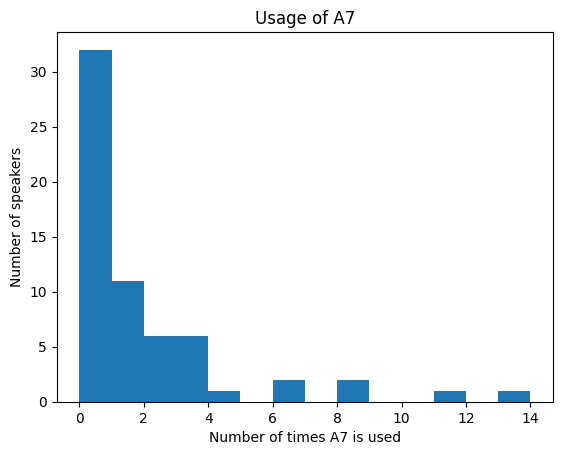

In [24]:
#Create a plot where we could see how many speakers use A7 for different number of times during the interview.  
ax=merged_df['A7'].plot.hist(bins=14) 
# Please put the max number of usage into the bins = Max number, so that you can see clearly how many speakers use the form up to different number of times.
# However, if the number of usage is huge, for example 100 times, then perhaps it is best to let the program to decide on the bins, so please delete the phrase bins=14.

#Set the label on the chart to explain
ax.set(xlabel='Number of times A7 is used', ylabel='Number of speakers',title="Usage of A7")



[Text(0.5, 0, 'Number of times E7 is used'),
 Text(0, 0.5, 'Number of speakers'),
 Text(0.5, 1.0, 'Usage of E7')]

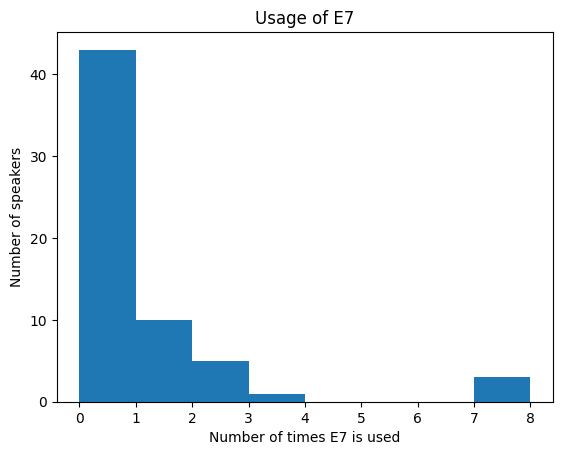

In [25]:
#Similar to the above, create a plot where we could see how many speakers use E7 for different number of times during the interview.  
# the maximum number of E7 is 8, so we set bins=8
ax=merged_df['E7'].plot.hist(bins=8)
ax.set(xlabel='Number of times E7 is used', ylabel='Number of speakers',title="Usage of E7")


[Text(0.5, 0, 'Number of times B7 is used'),
 Text(0, 0.5, 'Number of speakers'),
 Text(0.5, 1.0, 'Usage of B7')]

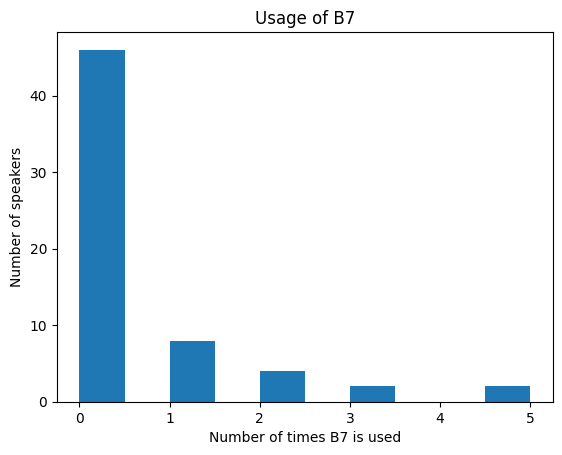

In [26]:
#Similar to the above, create a plot where we could see how many speakers use B7 for different number of times during the interview.  
#Because the max number is only 5 and small, so we do not set the bins as the program will just run accordingly
ax=merged_df['B7'].plot.hist()
ax.set(xlabel='Number of times B7 is used', ylabel='Number of speakers',title="Usage of B7")


### Observation
Although compared to other forms of the term 'day', the large number of A7, E7, B7 seems to be related to a few individuals who use the form relatively often, while large number of speakers do not use them at all.
We could extract the demographic data of these inviduals to understand their background too.

In [27]:
#demographic data of the user who use A7 for 14 times. You could plug in different variables and number times to examine the others. 
merged_df[merged_df['A7']==14]

,Religion,Gender,Age,Interview_Length,Village,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
Nid,,,,,,,,,,,,,,,
Tor1,Skotadi,Female,69,4,Temaiku,14,5,0,0,8,0,1,0,0,28


In [28]:
#demographic data of the user
merged_df[merged_df['E7']==8]

,Religion,Gender,Age,Interview_Length,Village,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
Nid,,,,,,,,,,,,,,,
RD1,Drepadian,Female,52,3,Rawannawi,11,2,1,0,8,0,0,0,0,22
Tor1,Skotadi,Female,69,4,Temaiku,14,5,0,0,8,0,1,0,0,28


In [29]:
merged_df[merged_df['B7']==5]


,Religion,Gender,Age,Interview_Length,Village,A7,B7,C7,D7,E7,F7,G7,H7,I7,Total
Nid,,,,,,,,,,,,,,,
T1,Drepadian,Male,66,3,Temaiku,6,5,0,0,0,0,1,0,0,12
Tor1,Skotadi,Female,69,4,Temaiku,14,5,0,0,8,0,1,0,0,28


### Observation
It seems that Tor1 is the speaker who uses these three common forms most often while another two speakers also use E7 and B7 most often. 

## Relationship betweeen demographic variables and the usage of the forms
To examine the relationship, three analyses are conducted:
1. Visualisation of the variables against each other to reveal any potential trends
2. Tabulation of the variables showing the mean scores of usage to reveal any potential effects
3. Logistic Regression to examine any statistically signifant predictors of the usage of the various forms 

*Note:* 
Due to time constraint, we only visualise and tabulate the relationship between the demographic variables and the usage of A7. You may change the variable name A7 to other form to examine the relationship.



### Visualisation

Due to multiple demographic variables, we are not able to visualise the relationship between all the variables in relation to A7. So we are going to investigate the relationship by examining **Village** and **Religion** separately, while keeping Age and Gender in both investigation. As both Age and A7 can be considered continuous variables, so they can be presented in scatterplot on x-axia and y-axis, while the categorical variable Gender and Village/Religion will be presented in the scatterplot indicated by shape and colour respectively. 

We do not examine the length of interview in the visualisation because it is not demographic variables.

*Note*
Due to some technical problems and time constraint, I could not label the title, x-axis and y-axis properly. I will make note in each visualisation

[]

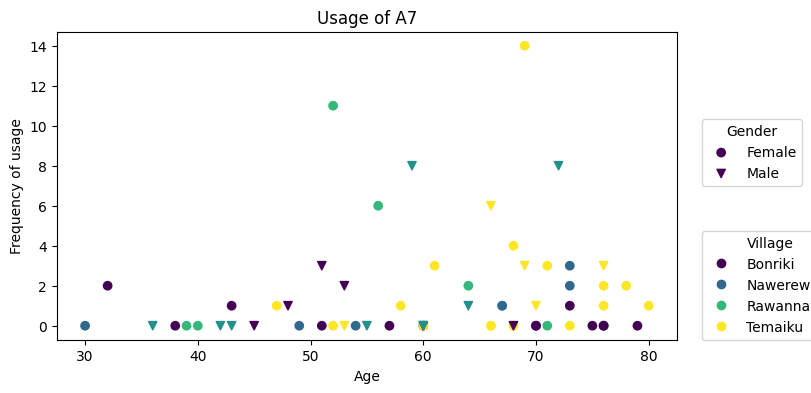

In [30]:
#Visualise Village, Age, Gender in relation to usage of A7

plt.figure(figsize=(8,4))

#plot the scatter plot for Female
scatter_female = plt.scatter(merged_df.Age[merged_df['Gender']=='Female'], 
            merged_df.A7[merged_df['Gender']=='Female'],
            c=merged_df.Village[merged_df['Gender']=='Female'].astype('category').cat.codes,marker='o',label='Female')
#plot the scatter plot for Male
scatter_male = plt.scatter(merged_df.Age[merged_df['Gender']=='Male'], 
            merged_df.A7[merged_df['Gender']=='Male'],
            c=merged_df.Village[merged_df['Gender']=='Male'].astype('category').cat.codes,marker='v',label='Male')


# add legend to the plot with names
village_names = ['Bonriki','Nawerewere','Rawannawi','Temaiku']
gender_name =['Female','Male']

first_legend=plt.legend(handles=scatter_female.legend_elements()[0], loc=(1.04, 0),
           labels=village_names,
           title="Village")
plt.gca().add_artist(first_legend)



plt.legend(loc=(1.04, 0.5), 
           labels=gender_name,
           title="Gender")


plt.title('Usage of A7')
plt.xlabel('Age')
plt.ylabel('Frequency of usage')
plt.plot()



Chart Title: Usage of A7 in relation to Village, Gender, Age
X-axis = Age
Y-axis = Number of times A7 is used

[]

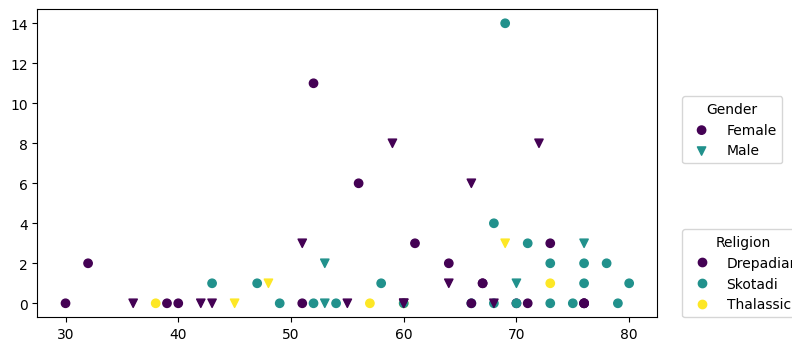

In [31]:
#Visualise Religion, Age, Gender in relation to usage of A7

plt.figure(figsize=(8,4))


#plot the scatter plot for Female
scatter_female = plt.scatter(merged_df.Age[merged_df['Gender']=='Female'], 
            merged_df.A7[merged_df['Gender']=='Female'],
            c=merged_df.Religion[merged_df['Gender']=='Female'].astype('category').cat.codes,marker='o',label='Female')
#plot the scatter plot for Male
scatter_male = plt.scatter(merged_df.Age[merged_df['Gender']=='Male'], 
            merged_df.A7[merged_df['Gender']=='Male'],
            c=merged_df.Religion[merged_df['Gender']=='Male'].astype('category').cat.codes,marker='v',label='Male')

# add legend to the plot with names
religion_name = ['Drepadian','Skotadi','Thalassic']
gender_name =['Female','Male']

first_legend=plt.legend(handles=scatter_female.legend_elements()[0], loc=(1.04, 0),
           labels=religion_name,
           title="Religion")
plt.gca().add_artist(first_legend)

plt.legend(loc=(1.04, 0.5), 
           labels=gender_name,
           title="Gender")
plt.plot()

Chart Title: Usage of A7 in relation to Religion, Gender, Age
X-axis = Age
Y-axis = Number of times A7 is used

### Observation
The visualisation does not show any clear relationship between the demographic variables and the usage of A7, except that in the second chart, it seems that some speakers from the Drepadian seem to use A7 form more. This can be further investigated in the logistic regression , which will be conducted later.





## Tabulation
Although visualisation is sometimes useful to see the trend or patterns, personally, I actually sometimes prefer to tabulate data as it reduces any bias created by chart scale sometimes and allows me to see the real numbers. Here, I put all the categorical variables into a cross-tabulation, and calculate the mean number of usage of A7 in each condition. Nonetheless, because some condition only consists of one or two persons, the mean number of usage of A7 can be inflated by them.

In [32]:
crosstab_A7=pd.crosstab([merged_df['Village'],merged_df['Gender']],merged_df['Religion'],values=merged_df['A7'],aggfunc=[np.mean])
crosstab_A7

mean                    
Religion          Drepadian   Skotadi Thalassic
Village    Gender                              
Bonriki    Female  0.400000  0.250000      0.25
           Male    1.000000  2.000000      0.50
Nawerewere Female  1.333333  0.666667       NaN
Rawannawi  Female  2.500000       NaN       NaN
           Male    2.125000       NaN       NaN
Temaiku    Female  1.500000  2.071429       NaN
           Male    6.000000  1.333333      3.00

### Observation

It should be noted that, although the mean score of Male Drepadian from Temaiku is 6, it is only based on 1 person. This is similar to the mean score of 3 in the Male Thalassic from Temaiku.

Nonetheless, from this tabulation, it seems Drepadian from Rawannawi on average use the A7 form more often, to some extent in line with what visualisation reveals above, that is, some Drepadian seems to use the form more often.   

To further examine what is found in the visualisation and tabulation which is descriptive in nature, we now go into statistical modelling. 

### Logistic Regression

To explore the 'effect' of the demographic variables on the outcome variables, we could conduct statistical modelling to establish the relationship. 

I initially plan to conduct Poisson regression analysis to examine the relationship between the number of times a form is used and the demographic variables, because the outcome variable is count data. However, there are too many zeros and the relative small sample sizes led me wonder if it will work. I might need to investigate more for the zero-inflated version of the model and any adjustment required for the Poisson regression model. Given the constraint of time and my limited knowledge regarding this model, I decided to look for alternative model which is simpler and more parsimonious and easier to understand. Therefore, I resort to logistic regression. 

Logistic regression is an analysis model that investigates if some variables can predict the binary category of the outcome variables, and if the changes in those predictors will increase the probability of the outcome being one of the binary category. To conduct the logistic regression, the outcome variables need to be binary, for example Yes or No. To apply to the current study, we will need to transform the usage data into either the form is used, or the form is not used. As observed in the above histogram, because more than half of the users did not use the forms, and the usage frequency is relatively sparse, I transformed the data from frequency of usage of the form into whether a form is used (coded as 1) or is not used (coded as 0). I did not separate the data into training and testing set, as the dataset is small to start with and my purposes is to describe the current sample only. 

To examine if any of the demographic variables predict the usage of the various forms, I conduct three logistic regression models with usage of A7, E7 and B7 as the outcome variables. The other outcome variables seems to be at the floor, i.e., most speakers do not use it, so it might not be useful to conduct the analysis. Nonetheless, you can always run the logistic regression on other outcome variables by changing the variable names. 



In [33]:
#Transformed A7 into binary (0 vs 1)
merged_df['A7_transformed']=0
merged_df['A7_transformed'][merged_df['A7']>0]=1
merged_df['A7_transformed'].value_counts()

0    32
1    30
Name: A7_transformed, dtype: int64

In [34]:
#Conduct logistic regression
model = smf.logit('A7_transformed ~ Village + Age + Religion + Interview_Length', data=merged_df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.534098
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         A7_transformed   No. Observations:                   62
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                            7
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.2289
Time:                        08:58:34   Log-Likelihood:                -33.114
converged:                       True   LL-Null:                       -42.943
Covariance Type:            nonrobust   LLR p-value:                  0.006359
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.0661      1.816     -2.239      0.025      -7.626      -0.

### Observation
The Pseudo R-squared \(which indicates effect size\) is relatively low (0.2289), suggesting that the model as a whole does not predict the use of A7 well, althogh the LLR p-value is less than 0.05, which suggests that the model is statistically significant in predicting the use of A7. 

When we look at the effect of individual predictors (the coef and P>|z| in the table), as expected, the length of interview significantly predict the likelihood of using A7 (p=0.002). The longer the interview, the more likely the form will be used. The effect of Temaiku is marginal, with p value =0.099, suggesting that being from Temaiku increases the likelihood of using A7. The positive sign in the coefficient means the change of the variable will increase the chance of using A7, while negative sign means the form is less likely to be used. 

In [35]:
#Conduct logistic regression with E7 as the outcome variable
merged_df['E7_transformed']=0
merged_df['E7_transformed'][merged_df['E7']>0]=1
merged_df['E7_transformed'].value_counts()

model = smf.logit('E7_transformed ~ Village + Age + Religion + Interview_Length', data=merged_df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.505920
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         E7_transformed   No. Observations:                   62
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                            7
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.1790
Time:                        08:58:34   Log-Likelihood:                -31.367
converged:                       True   LL-Null:                       -38.206
Covariance Type:            nonrobust   LLR p-value:                   0.05720
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.8465      1.827     -1.558      0.119      -6.427       0.

In [36]:
#Conduct logistic regression with B7 as the outcome variable
merged_df['B7_transformed']=0
merged_df['B7_transformed'][merged_df['B7']>0]=1
merged_df['B7_transformed'].value_counts()

model = smf.logit('B7_transformed ~ Village + Age + Religion + Interview_Length', data=merged_df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.454625
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         B7_transformed   No. Observations:                   62
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                            7
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.2038
Time:                        08:58:34   Log-Likelihood:                -28.187
converged:                       True   LL-Null:                       -35.403
Covariance Type:            nonrobust   LLR p-value:                   0.04399
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.6497      1.979     -1.339      0.181      -6.528       1.

### Observation
These two models are similar to the logistic model predicting A7 usage, with only the length of interview significant in predicting the outcome. It is as expected, as the longer the interview, the more chance that a form can be used. Nonetheless, it does not necessarily mean that the other predictors are not related to the usage of the three forms. It could simply due to limited sample size and small effect sizes could not be detected in this sample. 



## Steps to ensure FAIR open research principles
In this exercise, I consider the FAIR open research principles from two perspectives, i.e., from the machine and human, as well as in two areas of applications, i.e., data and analysis procedure. Among the four principles, I overlook 'Findability' as I did not share the data set and notebook in the public repository as I do not own the data. The other three principles Accessibility, Interoperability, Reusability are discussed below. In this exercise, I focus more on human rather than machine, and analysis more than data. This is because my client is a researcher who aims for analysis, so I would need to prioritize them.

1. **Accessibility** 
As mentioned earlier, I do not focus on the accessibility of the data. However, in the description, I do inclue the information of the data sets used as well as the entity which provides the data. Therefore, others would be able to know what kind of (meta)data is used in this analysis and whom to contact to access the data. In terms of this analysis procedure, I most likely will make it public on my github, so it is accessible to others, although I may need to create some metadata to describe this notebook to make it accessible and findable. 

2. **Interoperability & Reusability**
The analysis is conducted by using Python language and libraries which are common for data analysis. Furthermore, I also include code for installing relevant libraries for those who don't use jupyter notebook on Ananconda. Nonetheless, the interoperability of this analysis can be further improved by including other common software code such as R. For the analysis procedure to be operable for different data files and variables, I indicate in comments how to change the code and the data structure. This also makes the analysis procedure reusable. 